In [4]:
# import os
# import sys
# sys.path.insert(0, os.path.abspath('../my_modules'))

# print(sys.path)

import os, sys
import h5py
import numpy as np
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.font_manager as font_manager
from tqdm.autonotebook import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import time
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats

import etroc0_benchtest


npoints is 2000
events_t is 1000


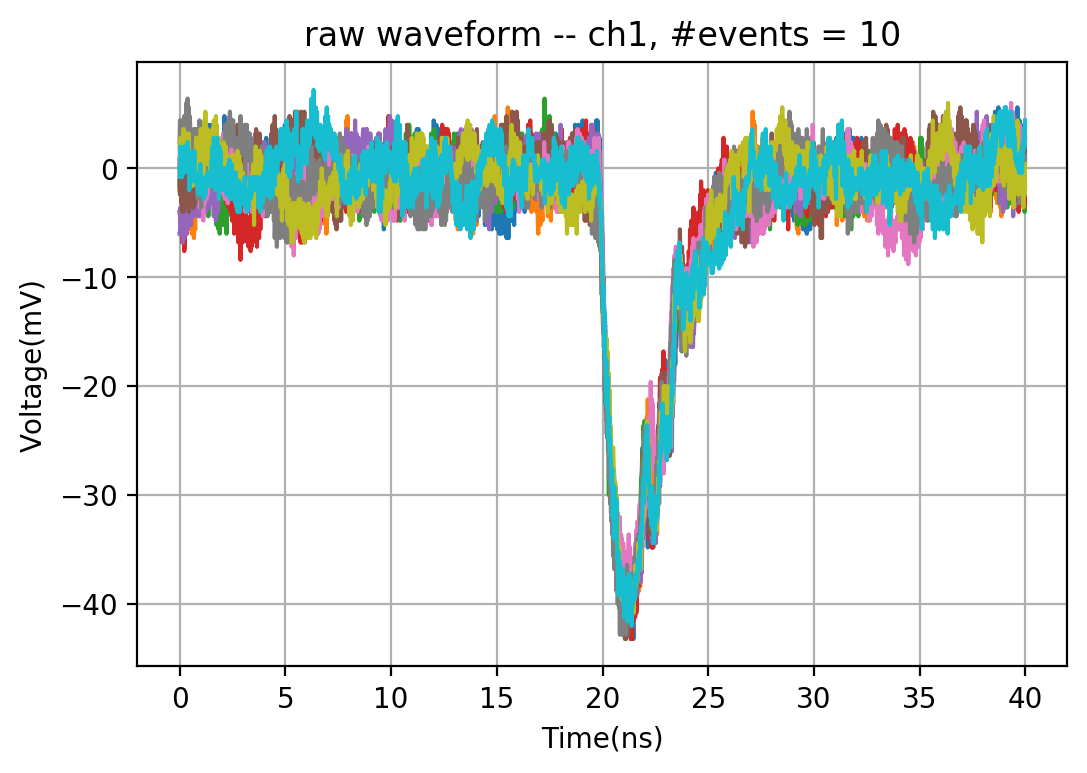

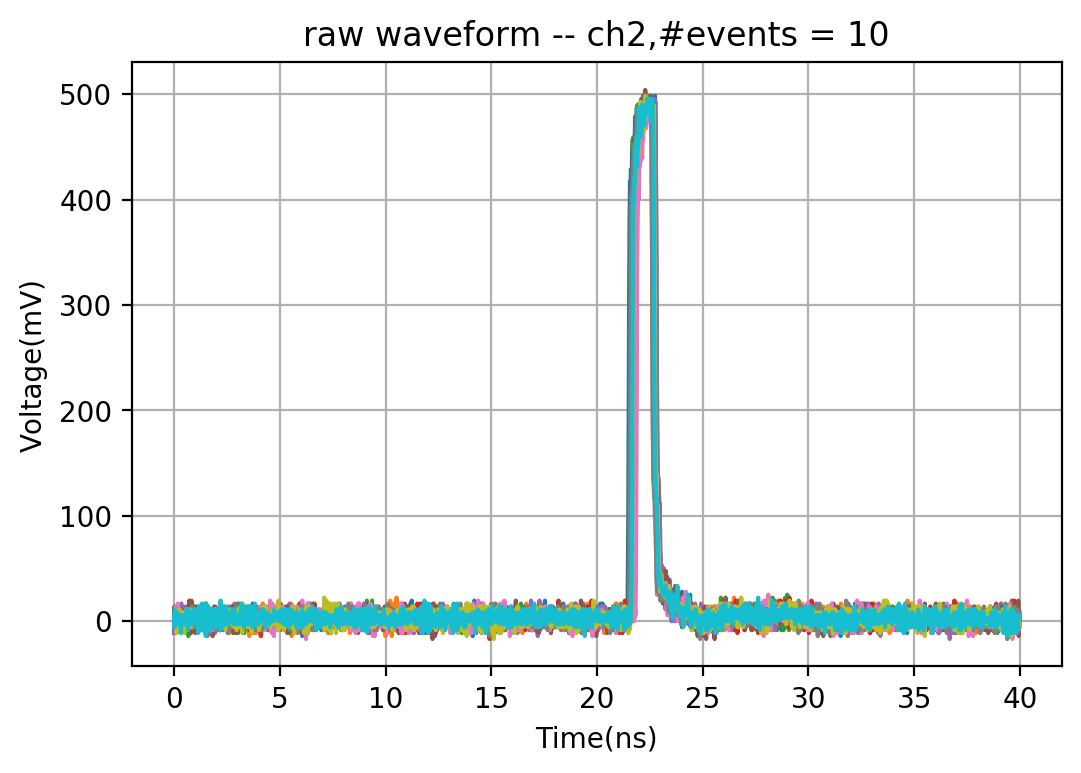

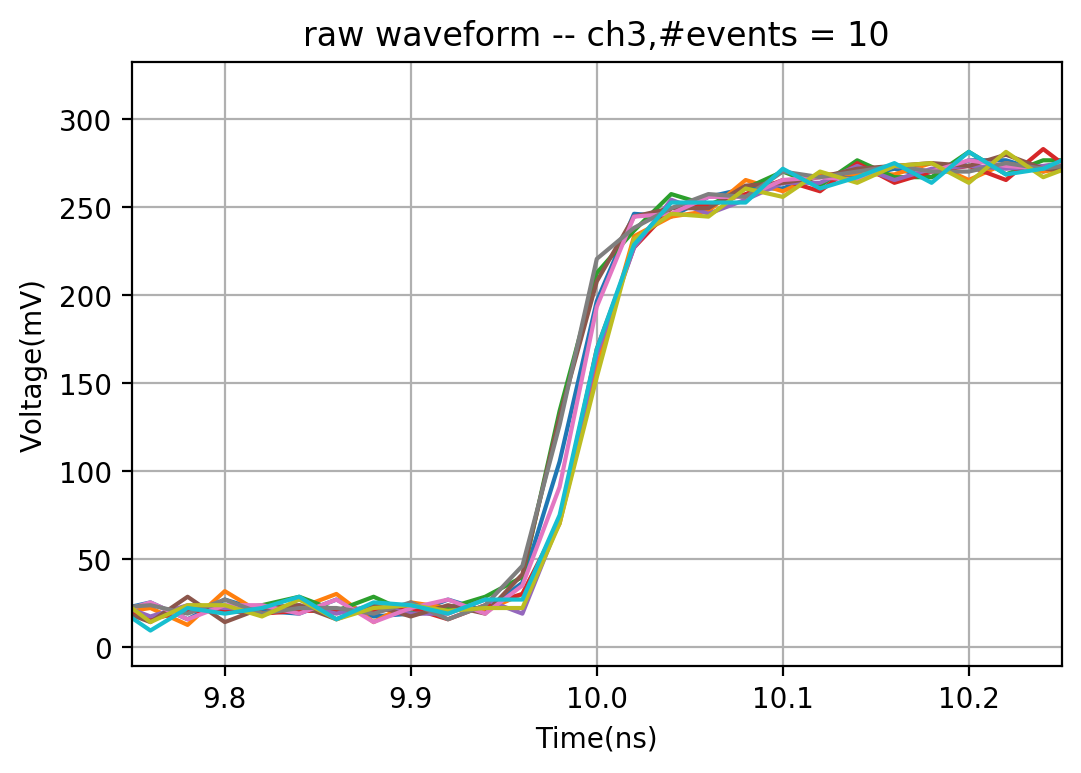

In [10]:
########## ETROC0 batch1 board1 ######################
textstr = '\n'.join((
    '-- ETROC0 batch1 board1',
    '-- baseline = DAC207',
    '-- low power, default gain'))
path ="../../../CMS ETL ASIC/ETROC0/test results/FNAL_Test/202006_ETROC0/"
file_in = 'DGDP/3fC/DGDP_DAC222_3fC_0.hdf5'
# file_in = 'DGDP/30fC/DGDP_DAC216_30fC_0.hdf5'
# file_in = 'DGDP/4fC/DGDP_DAC228_4fC_0.hdf5'



################## check waveform  #######################

file = path + file_in

data, attrs = etroc0_benchtest.extract_dataset(file)
events_t = attrs['readout_size']
npoints = attrs['nPt']
x = np.arange(npoints)
dt = attrs['dt']

filelist = []
filelist_to_use = [file_in]
for apath in filelist_to_use:
    if apath.find(".hdf5") > -1:
        filelist.append(os.path.join(path,apath))
y_ch1 = []
y_ch2 = []
y_ch3 = []
y_ch4 = []
for item in tqdm(filelist):
    data, attrs = etroc0_benchtest.extract_dataset(item)
    for event in range(len(data[0])):
        y_ch1.append(data[0][event])
    for event in range(len(data[1])):
        y_ch2.append(data[1][event])
    for event in range(len(data[2])):
        y_ch3.append(data[2][event])
    for event in range(len(data[3])):
        y_ch4.append(data[3][event])

events_ch1 = len(y_ch1)
events_ch2 = len(y_ch2)
events_ch3 = len(y_ch3)
events_ch4 = len(y_ch4)
events_t = events_ch1
time = x*dt*1e9




# plt.plot(y_ch1[2109])
print('npoints is',npoints)
print('events_t is',events_t)

# events_t = events_t - 2500
events_t = events_t - 990


######### Plot signal with points ch1  ###########
fig, ax1 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax1.plot(time, y_ch1[ab]*1000)
# ax1.set_xlim(left=15,right=25)
ax1.grid()
ax1.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch1, #events = %d'%(events_t))
# pp.savefig(fig)
plt.show()


######### Plot signal with points ch2  ###########
fig, ax2 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax2.plot(time, y_ch2[ab]*1000)
# ax2.set_xlim(left=15,right=20)
ax2.grid()
ax2.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch2,#events = %d'%(events_t))
# pp.savefig(fig)
plt.show()

######### Plot signal with points ch3  ###########
fig, ax3 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax3.plot(time, y_ch3[ab]*1000)
ax3.set_xlim(left=9.75,right=10.25)
ax3.grid()
ax3.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch3,#events = %d'%(events_t))
# pp.savefig(fig)
plt.show()

# ######### Plot signal with points ch4  ###########
# fig, ax4 = plt.subplots(dpi=200)
# for ab in range(0,events_t):
#     ax4.plot(time, y_ch4[ab]*1000)
# # ax2.set_xlim(left=60,right=80)
# ax4.grid()
# ax4.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
#        title='raw waveform -- ch4,#events = %d'%(events_t))
# # pp.savefig(fig)
# plt.show()

# plt.close(fig)



In [ ]:
########################################## DAC 216 #################################
filelist = [
    'DGDP/3fC/DGDP_DAC216_3fC_0.hdf5',
    'DGDP/4fC/DGDP_DAC216_4fC_0.hdf5',
    'DGDP/5fC/DGDP_DAC216_5fC_0.hdf5',
    'DGDP/6fC/DGDP_DAC216_6fC_0.hdf5',
    'DGDP/8fC/DGDP_DAC216_8fC_0.hdf5',
    'DGDP/10fC/DGDP_DAC216_10fC_0.hdf5',
    'DGDP/12fC/DGDP_DAC216_12fC_0.hdf5',
    'DGDP/15fC/DGDP_DAC216_15fC_0.hdf5',
    'DGDP/20fC/DGDP_DAC216_20fC_0.hdf5',
    'DGDP/30fC/DGDP_DAC216_30fC_0.hdf5'
]

charge_DAC216_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]

# filelist = [
#     'DGDP/4fC/DGDP_DAC222_4fC_0.hdf5',
#     'DGDP/5fC/DGDP_DAC222_5fC_0.hdf5'
# ]

file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC216_list = []
mean_t_trigger_DAC216_list = []
std_t_trigger_DAC216_list = []
t_pa_DAC216_list = []
mean_t_pa_DAC216_list = []
std_t_pa_DAC216_list = []
t_discri_le_DAC216_list = []
mean_t_discri_le_DAC216_list = []
std_t_discri_le_DAC216_list = []
t_discri_te_DAC216_list = []
mean_t_discri_te_DAC216_list = []
std_t_discri_te_DAC216_list = []
t_discri_le_notrig_DAC216_list = []
mean_t_discri_le_notrig_DAC216_list = []
std_t_discri_le_notrig_DAC216_list = []
t_discri_te_notrig_DAC216_list = []
mean_t_discri_te_notrig_DAC216_list = []
std_t_discri_te_notrig_DAC216_list = []
ampl_ch1_DAC216_list = []
mean_ampl_DAC216_list = []
std_ampl_DAC216_list = []
q_ch1_DAC216_list = []
mean_q_DAC216_list = []
std_q_DAC216_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=5e-3, transCond = 4.4e3, 
        tdc_start_trigger=9.8, tdc_start_pa=18, tdc_le_start=20, tdc_te_start=30)
    
    t_trigger_DAC216_list.append(t_trigger)
    mean_t_trigger_DAC216_list.append(mean_t_trigger)
    std_t_trigger_DAC216_list.append(std_t_trigger*1000)
    t_pa_DAC216_list.append(t_pa)
    mean_t_pa_DAC216_list.append(mean_t_pa)
    std_t_pa_DAC216_list.append(std_t_pa*1000)
    t_discri_le_DAC216_list.append(t_discri_le)
    mean_t_discri_le_DAC216_list.append(mean_t_discri_le)
    std_t_discri_le_DAC216_list.append(std_t_discri_le*1000)
    t_discri_te_DAC216_list.append(t_discri_te)
    mean_t_discri_te_DAC216_list.append(mean_t_discri_te)
    std_t_discri_te_DAC216_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC216_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC216_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC216_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC216_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC216_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC216_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC216_list.append(ampl_ch1)
    mean_ampl_DAC216_list.append(mean_ampl)
    std_ampl_DAC216_list.append(std_ampl)
    q_ch1_DAC216_list.append(q_ch1)
    mean_q_DAC216_list.append(mean_q)
    std_q_DAC216_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC216_list is\n',std_t_pa_DAC216_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC216_list is\n',std_t_discri_le_notrig_DAC216_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC216_list is\n', std_t_discri_te_notrig_DAC216_list)
print('*****************************************************************************************')
print('mean_ampl_DAC216_list is\n', mean_ampl_DAC216_list)
print('*****************************************************************************************')
print('mean_q_DAC216_list is\n', mean_q_DAC216_list)

In [ ]:
########################################## DAC 222 #################################
filelist = [
#     'DGDP/3fC/DGDP_DAC222_3fC_0.hdf5',
    'DGDP/4fC/DGDP_DAC222_4fC_0.hdf5',
    'DGDP/5fC/DGDP_DAC222_5fC_0.hdf5',
    'DGDP/6fC/DGDP_DAC222_6fC_0.hdf5',
    'DGDP/8fC/DGDP_DAC222_8fC_0.hdf5',
    'DGDP/10fC/DGDP_DAC222_10fC_0.hdf5',
    'DGDP/12fC/DGDP_DAC222_12fC_0.hdf5',
    'DGDP/15fC/DGDP_DAC222_15fC_0.hdf5',
    'DGDP/20fC/DGDP_DAC222_20fC_0.hdf5',
    'DGDP/30fC/DGDP_DAC222_30fC_0.hdf5'
]

charge_DAC222_list = [4, 5, 6, 8, 10, 12, 15, 20, 30]

# filelist = [
#     'DGDP/4fC/DGDP_DAC222_4fC_0.hdf5',
#     'DGDP/5fC/DGDP_DAC222_5fC_0.hdf5'
# ]

file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC222_list = []
mean_t_trigger_DAC222_list = []
std_t_trigger_DAC222_list = []
t_pa_DAC222_list = []
mean_t_pa_DAC222_list = []
std_t_pa_DAC222_list = []
t_discri_le_DAC222_list = []
mean_t_discri_le_DAC222_list = []
std_t_discri_le_DAC222_list = []
t_discri_te_DAC222_list = []
mean_t_discri_te_DAC222_list = []
std_t_discri_te_DAC222_list = []
t_discri_le_notrig_DAC222_list = []
mean_t_discri_le_notrig_DAC222_list = []
std_t_discri_le_notrig_DAC222_list = []
t_discri_te_notrig_DAC222_list = []
mean_t_discri_te_notrig_DAC222_list = []
std_t_discri_te_notrig_DAC222_list = []
ampl_ch1_DAC222_list = []
mean_ampl_DAC222_list = []
std_ampl_DAC222_list = []
q_ch1_DAC222_list = []
mean_q_DAC222_list = []
std_q_DAC222_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=5e-3, transCond = 4.4e3, 
        tdc_start_trigger=9.8, tdc_start_pa=18, tdc_le_start=20, tdc_te_start=30)
    
    t_trigger_DAC222_list.append(t_trigger)
    mean_t_trigger_DAC222_list.append(mean_t_trigger)
    std_t_trigger_DAC222_list.append(std_t_trigger*1000)
    t_pa_DAC222_list.append(t_pa)
    mean_t_pa_DAC222_list.append(mean_t_pa)
    std_t_pa_DAC222_list.append(std_t_pa*1000)
    t_discri_le_DAC222_list.append(t_discri_le)
    mean_t_discri_le_DAC222_list.append(mean_t_discri_le)
    std_t_discri_le_DAC222_list.append(std_t_discri_le*1000)
    t_discri_te_DAC222_list.append(t_discri_te)
    mean_t_discri_te_DAC222_list.append(mean_t_discri_te)
    std_t_discri_te_DAC222_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC222_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC222_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC222_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC222_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC222_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC222_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC222_list.append(ampl_ch1)
    mean_ampl_DAC222_list.append(mean_ampl)
    std_ampl_DAC222_list.append(std_ampl)
    q_ch1_DAC222_list.append(q_ch1)
    mean_q_DAC222_list.append(mean_q)
    std_q_DAC222_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC222_list is\n',std_t_pa_DAC222_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC222_list is\n',std_t_discri_le_notrig_DAC222_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC222_list is\n', std_t_discri_te_notrig_DAC222_list)
print('*****************************************************************************************')
print('mean_ampl_DAC222_list is\n', mean_ampl_DAC222_list)
print('*****************************************************************************************')
print('mean_q_DAC222_list is\n', mean_q_DAC222_list)

In [ ]:
########################################## DAC 232 #################################
filelist = [
#     'DGDP/3fC/DGDP_DAC228_3fC_0.hdf5',
#     'DGDP/4fC/DGDP_DAC228_4fC_0.hdf5',
    'DGDP/5fC/DGDP_DAC228_5fC_0.hdf5',
    'DGDP/6fC/DGDP_DAC228_6fC_0.hdf5',
    'DGDP/8fC/DGDP_DAC228_8fC_0.hdf5',
    'DGDP/10fC/DGDP_DAC228_10fC_0.hdf5',
    'DGDP/12fC/DGDP_DAC228_12fC_0.hdf5',
    'DGDP/15fC/DGDP_DAC228_15fC_0.hdf5',
    'DGDP/20fC/DGDP_DAC228_20fC_0.hdf5',
    'DGDP/30fC/DGDP_DAC228_30fC_0.hdf5'
]

charge_DAC228_list = [5, 6, 8, 10, 12, 15, 20, 30]

# filelist = [
#     'DGDP/4fC/DGDP_DAC228_5fC_0.hdf5',
#     'DGDP/5fC/DGDP_DAC228_6fC_0.hdf5'
# ]

file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC228_list = []
mean_t_trigger_DAC228_list = []
std_t_trigger_DAC228_list = []
t_pa_DAC228_list = []
mean_t_pa_DAC228_list = []
std_t_pa_DAC228_list = []
t_discri_le_DAC228_list = []
mean_t_discri_le_DAC228_list = []
std_t_discri_le_DAC228_list = []
t_discri_te_DAC228_list = []
mean_t_discri_te_DAC228_list = []
std_t_discri_te_DAC228_list = []
t_discri_le_notrig_DAC228_list = []
mean_t_discri_le_notrig_DAC228_list = []
std_t_discri_le_notrig_DAC228_list = []
t_discri_te_notrig_DAC228_list = []
mean_t_discri_te_notrig_DAC228_list = []
std_t_discri_te_notrig_DAC228_list = []
ampl_ch1_DAC228_list = []
mean_ampl_DAC228_list = []
std_ampl_DAC228_list = []
q_ch1_DAC228_list = []
mean_q_DAC228_list = []
std_q_DAC228_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=5e-3, transCond = 4.4e3, 
        tdc_start_trigger=9.8, tdc_start_pa=18, tdc_le_start=20, tdc_te_start=30)
    
    t_trigger_DAC228_list.append(t_trigger)
    mean_t_trigger_DAC228_list.append(mean_t_trigger)
    std_t_trigger_DAC228_list.append(std_t_trigger*1000)
    t_pa_DAC228_list.append(t_pa)
    mean_t_pa_DAC228_list.append(mean_t_pa)
    std_t_pa_DAC228_list.append(std_t_pa*1000)
    t_discri_le_DAC228_list.append(t_discri_le)
    mean_t_discri_le_DAC228_list.append(mean_t_discri_le)
    std_t_discri_le_DAC228_list.append(std_t_discri_le*1000)
    t_discri_te_DAC228_list.append(t_discri_te)
    mean_t_discri_te_DAC228_list.append(mean_t_discri_te)
    std_t_discri_te_DAC228_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC228_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC228_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC228_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC228_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC228_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC228_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC228_list.append(ampl_ch1)
    mean_ampl_DAC228_list.append(mean_ampl)
    std_ampl_DAC228_list.append(std_ampl)
    q_ch1_DAC228_list.append(q_ch1)
    mean_q_DAC228_list.append(mean_q)
    std_q_DAC228_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC228_list is\n',std_t_pa_DAC228_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC228_list is\n',std_t_discri_le_notrig_DAC228_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC228_list is\n', std_t_discri_te_notrig_DAC228_list)
print('*****************************************************************************************')
print('mean_ampl_DAC228_list is\n', mean_ampl_DAC228_list)
print('*****************************************************************************************')
print('mean_q_DAC228_list is\n', mean_q_DAC228_list)

In [ ]:
############## plot  ###############
# charge_DAC216_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]
# charge_DAC222_list = [4, 5, 6, 8, 10, 12, 15, 20, 30]
# charge_DAC228_list = [5, 6, 8, 10, 12, 15, 20, 30]
# std_t_discri_le_notrig_DAC216_list = [55.081312393576745, 33.5965400004161, 26.05374253345816, 
#                                       22.5273605866244, 18.81562582004275, 16.048937659543025, 
#                                       14.973709460247598, 12.898332256533537, 11.479982578381783, 11.415248573725846]
# std_t_discri_le_notrig_DAC222_list = [42.264784099759545, 28.33616770136146, 21.60300904966283, 
#                                       16.700071856129487, 13.96251768127515, 12.108030393087999, 
#                                       11.495519779459704, 9.761443284676796, 8.225442237349645]
# std_t_discri_le_notrig_DAC228_list = [39.770094292060314, 25.770479234964462, 17.58708617138944, 
#                                       12.937893955351925, 11.500642373361078, 9.781051835051402, 
#                                       8.127113571248723, 6.910352740633446]


fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(charge_DAC216_list, std_t_discri_le_notrig_DAC216_list, 'o-', linewidth=2,  label="DAC216 LE")
ax1.plot(charge_DAC222_list, std_t_discri_le_notrig_DAC222_list, 'o-', linewidth=2,  label="DAC222 LE")
ax1.plot(charge_DAC228_list, std_t_discri_le_notrig_DAC228_list, 'o-', linewidth=2,  label="DAC228 LE")

ax1.set(ylabel='LE jitter(ps)',
       title='LE jitter vs charge')


ax1.grid(which='both')
ax1.legend(loc = 'upper right', fontsize = 'small')
plt.show()

fig2,ax2 = plt.subplots(dpi=200)
ax2.plot(charge_DAC216_list, std_t_discri_te_notrig_DAC216_list, 'o-', linewidth=2,  label="DAC216 TE")
ax2.plot(charge_DAC222_list, std_t_discri_te_notrig_DAC222_list, 'o-', linewidth=2,  label="DAC222 TE")
ax2.plot(charge_DAC228_list, std_t_discri_te_notrig_DAC228_list, 'o-', linewidth=2,  label="DAC228 TE")

ax2.set(xlabel='charge(fC)', ylabel='TE jitter(ps)',
       title='TE jitter vs charge')
ax2.grid(which='both')
ax2.legend(loc = 'lower left', fontsize = 'small')
plt.show()

In [11]:
############################### plot to pdf  ######################################
path_plot = './'
pp = PdfPages(path_plot+"plots_DGDP"+".pdf")

######### plot text box #####
fig0, ax0 = plt.subplots(dpi=200)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax0.text(0.05, 0.95, textstr, transform=ax0.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
ax0.set_xlim(left=0,right=50)
ax0.set_ylim(bottom=0,top=50)
pp.savefig(fig0)
plt.close(fig0)





pp.close()